<a href="https://colab.research.google.com/github/eceirem/Patika/blob/main/Airline_Passenger__Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Havayolu Yolcu Memnuniyeti Veri Seti incelemesi**

### Veriyi ve ilgili kütüpaneleri yükleme işlemi

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


#### Veri seti isimlendirmesi

In [171]:
passenger_satisfaction = pd.read_csv("train.csv")

## Veri İncelemesi

In [324]:
passenger_satisfaction.shape

(103904, 25)

In [139]:
passenger_satisfaction.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [140]:
passenger_satisfaction.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


### Veri Yapısı ve Özellikleri

In [141]:
passenger_satisfaction.info() #incelemede 103904 veri var ancak
#Arrival Delay in Minutes 103594 veriye sahip.
#null veri var mı?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [142]:
passenger_satisfaction.isnull().sum()
#üstteki tezimiz doğrulandı

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [143]:
passenger_satisfaction.duplicated().sum() #tekrar eden veri var mı?

np.int64(0)

In [144]:
passenger_satisfaction.describe().T #veri hakkında genel bir bilgi

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


### Eksik Değer Analizi ve İyileştirme




> eksik veri ile ne yapacağız?
silmek mi yoksa doldurmak mı?
Verinin medyanı 0
ortalama 15 -> outlier etkisi olabilir

> 1) satırları silebiliriz
> 2) medyan ile doldurabiliriz




In [145]:
passenger_satisfaction['Arrival Delay in Minutes'].describe()

,Arrival Delay in Minutes
count,103594.000000
mean,15.178678
std,38.698682
min,0.000000
25%,0.000000
50%,0.000000
75%,13.000000
max,1584.000000


### Eksik Verilerin Doldurulması

#### Outlier’ların Veri Üzerindeki Etkisi

> Outlier etkisi var mı kontrol edelim ve ortalamadan büyük değerleri bastıralım

In [146]:
outliers = passenger_satisfaction[passenger_satisfaction['Arrival Delay in Minutes'] > 15]

In [147]:
outliers.count()

,0
Unnamed: 0,23635
id,23635
Gender,23635
Customer Type,23635
Age,23635
Type of Travel,23635
Class,23635
Flight Distance,23635
Inflight wifi service,23635
Departure/Arrival time convenient,23635


### Outlier Görselleştirme

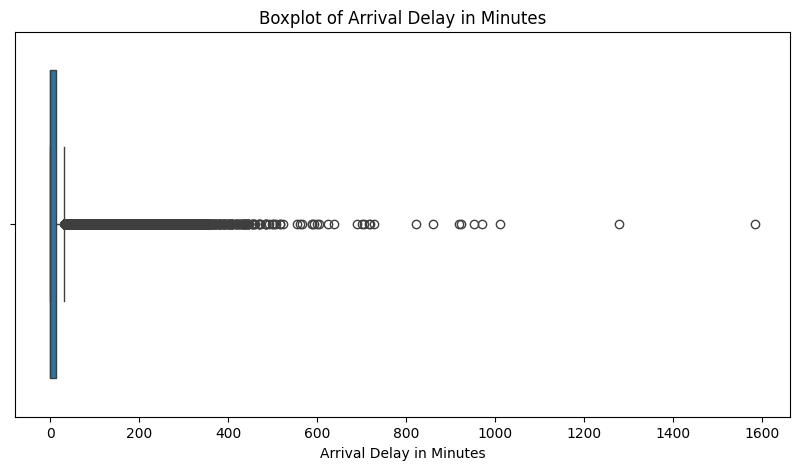

In [148]:
plt.figure(figsize=(10,5))
sns.boxplot(x=passenger_satisfaction['Arrival Delay in Minutes'])
plt.title('Boxplot of Arrival Delay in Minutes')
plt.show()

## Veri Güncelleme

### Veri Kopyalama

In [278]:
df = passenger_satisfaction.copy() #orjinal verinin kopyasını al

### Eksik Verilerin Doldurulması

> Veri dağılımı çarpık (skewed) ve aykırı, bu yüzden medyan ile dolduralım

In [279]:
#medyan ile dolduralım ve aradaki farka bakalım
median = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'].fillna(median, inplace=True)

/tmp/ipython-input-279-1865895414.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(median, inplace=True)


In [280]:
passenger_satisfaction['Arrival Delay in Minutes'].describe()

,Arrival Delay in Minutes
count,103594.000000
mean,15.178678
std,38.698682
min,0.000000
25%,0.000000
50%,0.000000
75%,13.000000
max,1584.000000


In [281]:
df.isnull().sum() #null veri kalmadı

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


# Veri Görselleştirme

## Obje Tipindeki Verilerin İncelenmesi ve Görselleştirmesi

In [226]:
categorical_cols = passenger_satisfaction.select_dtypes(include=['object']).columns.tolist()

In [227]:
categorical_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

Gender Column unique value counts:
Gender
Female    52727
Male      51177
Name: count, dtype: int64
__________________________________________________


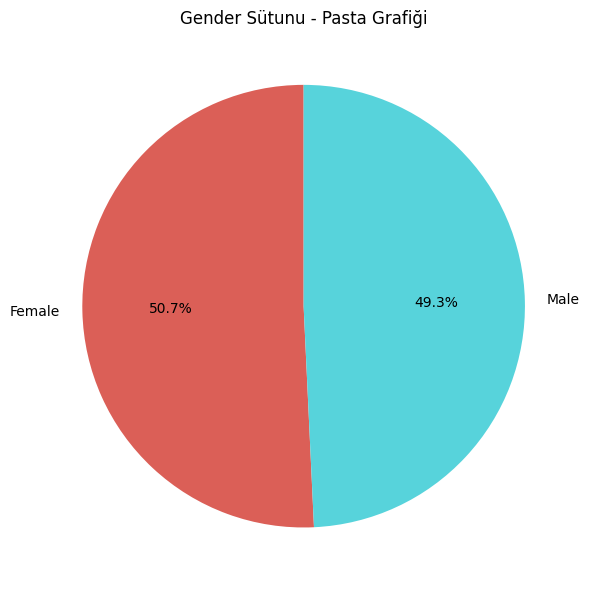

Customer Type Column unique value counts:
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
__________________________________________________


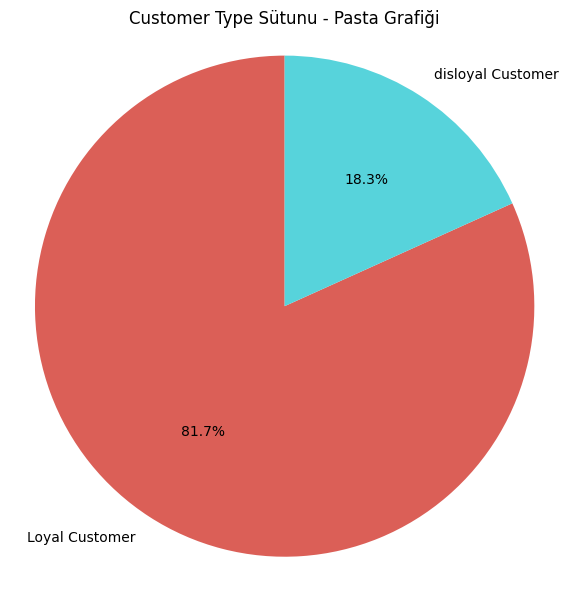

Type of Travel Column unique value counts:
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
__________________________________________________


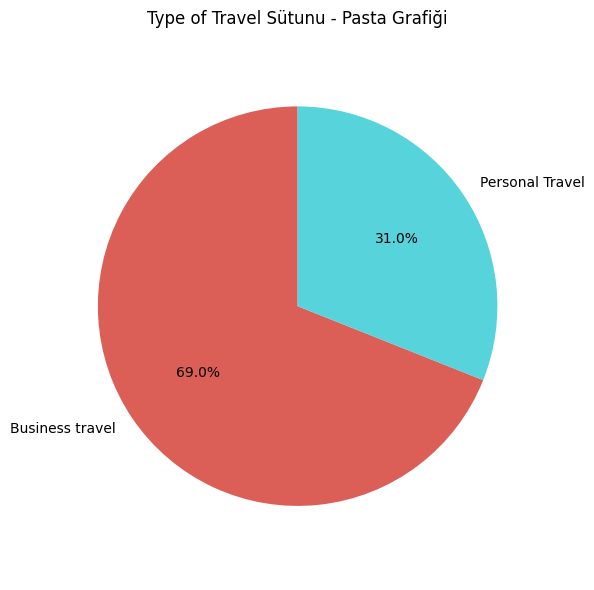

Class Column unique value counts:
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
__________________________________________________


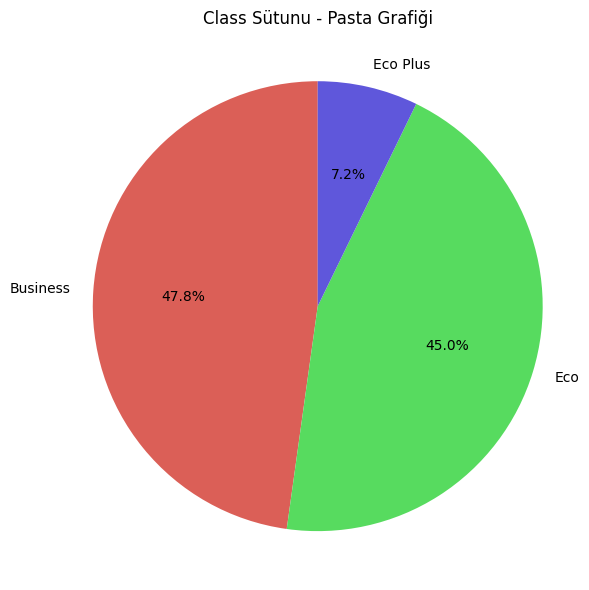

satisfaction Column unique value counts:
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64
__________________________________________________


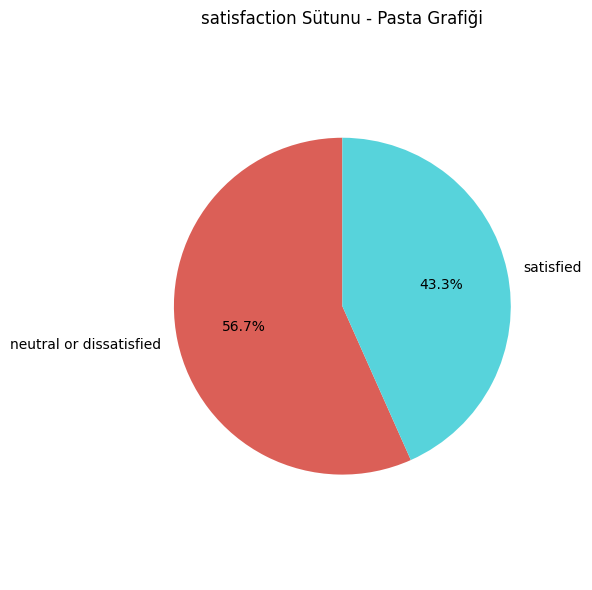

In [179]:
# Her bir kategorik kolon için analiz
for col in categorical_cols:
    value_counts = passenger_satisfaction[col].value_counts()
    categories = value_counts.index.tolist()

    print(f'{col} Column unique value counts:')
    print(passenger_satisfaction[col].value_counts())
    print('_' * 50)

    # kaç tane kategori varsa o kadar renk üretelim
    palette = sns.color_palette('hls', len(categories))
    colors = [mcolors.rgb2hex(c) for c in palette]

    plt.figure(figsize=(6,6))
    plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'{col} Sütunu - Pasta Grafiği')
    plt.axis('equal')  # Daireyi düzgün gösterir
    plt.tight_layout()
    plt.show()

## Sayısal Veri Tiplerinin İncelenmesi ve Görselleştirilmesi

In [180]:
numerical_cols = passenger_satisfaction.select_dtypes(include=['int','float']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['id', 'Unnamed: 0']]

Age Column unique value counts:
Age
7     562
8     640
9     692
10    683
11    678
     ... 
77     87
78     33
79     42
80     78
85     17
Name: count, Length: 75, dtype: int64
__________________________________________________


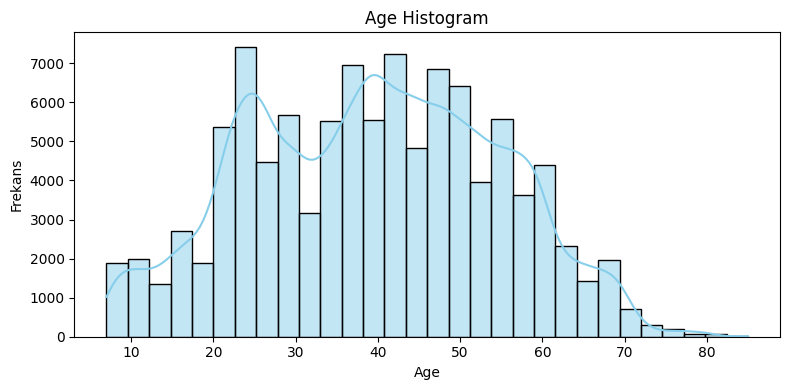

Flight Distance Column unique value counts:
Flight Distance
31        8
56        8
67      128
73       59
74       30
       ... 
4243     18
4502     10
4817      5
4963     13
4983     12
Name: count, Length: 3802, dtype: int64
__________________________________________________


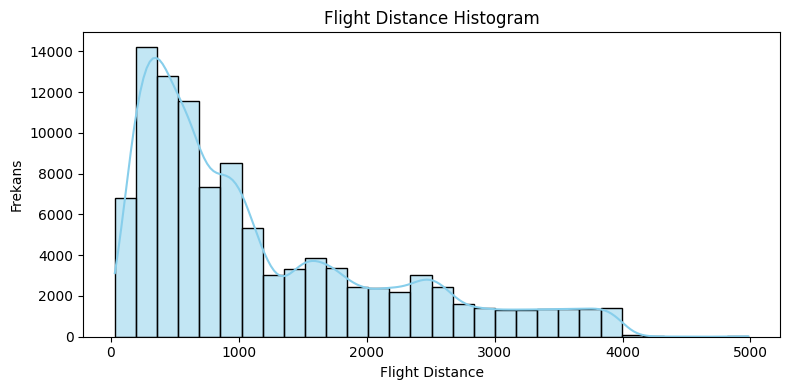

Inflight wifi service Column unique value counts:
Inflight wifi service
0     3103
1    17840
2    25830
3    25868
4    19794
5    11469
Name: count, dtype: int64
__________________________________________________


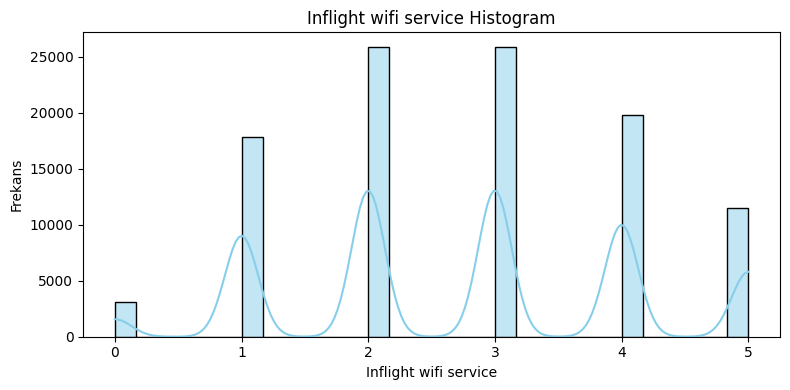

Departure/Arrival time convenient Column unique value counts:
Departure/Arrival time convenient
0     5300
1    15498
2    17191
3    17966
4    25546
5    22403
Name: count, dtype: int64
__________________________________________________


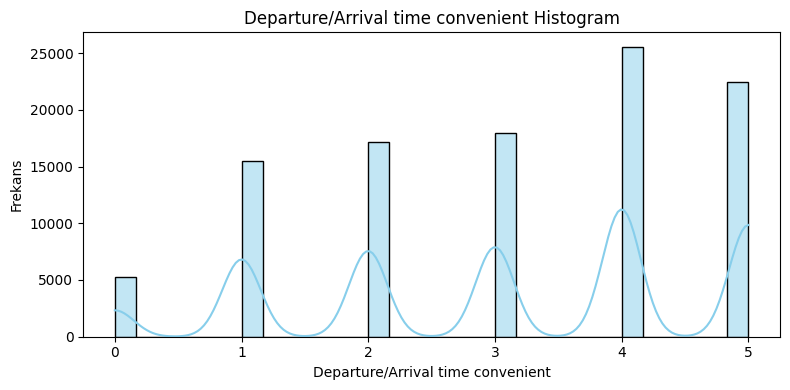

Ease of Online booking Column unique value counts:
Ease of Online booking
0     4487
1    17525
2    24021
3    24449
4    19571
5    13851
Name: count, dtype: int64
__________________________________________________


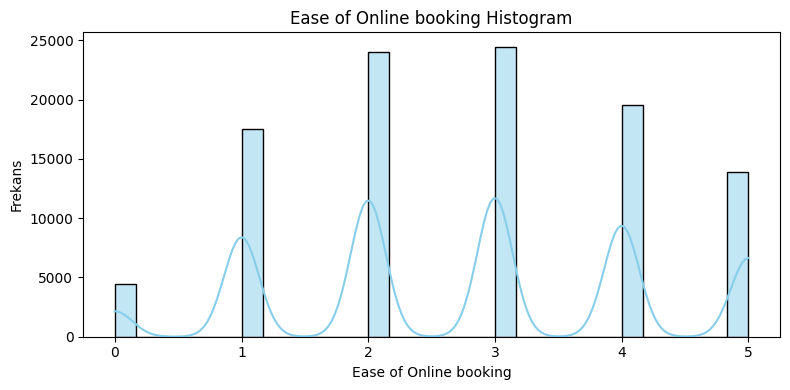

Gate location Column unique value counts:
Gate location
0        1
1    17562
2    19459
3    28577
4    24426
5    13879
Name: count, dtype: int64
__________________________________________________


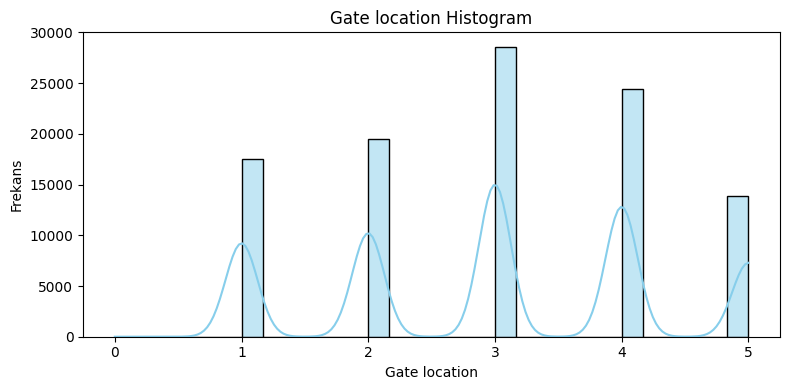

Food and drink Column unique value counts:
Food and drink
0      107
1    12837
2    21988
3    22300
4    24359
5    22313
Name: count, dtype: int64
__________________________________________________


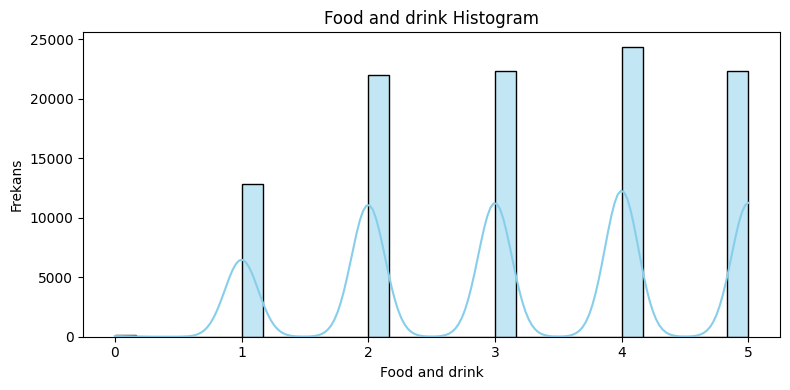

Online boarding Column unique value counts:
Online boarding
0     2428
1    10692
2    17505
3    21804
4    30762
5    20713
Name: count, dtype: int64
__________________________________________________


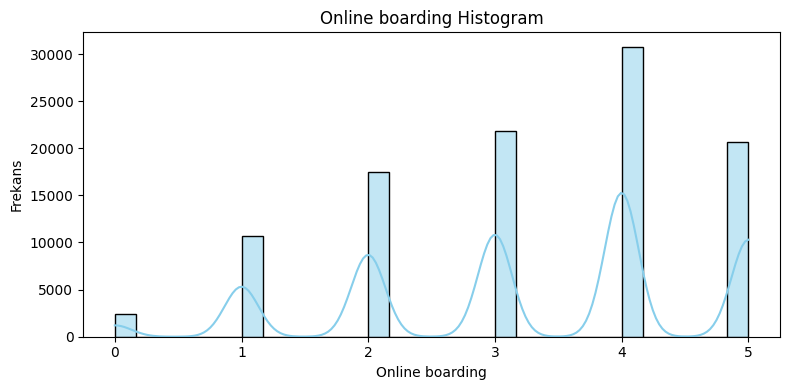

Seat comfort Column unique value counts:
Seat comfort
0        1
1    12075
2    14897
3    18696
4    31765
5    26470
Name: count, dtype: int64
__________________________________________________


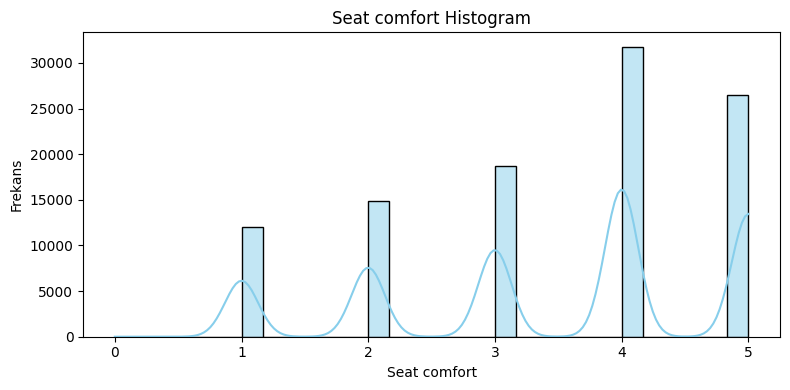

Inflight entertainment Column unique value counts:
Inflight entertainment
0       14
1    12478
2    17637
3    19139
4    29423
5    25213
Name: count, dtype: int64
__________________________________________________


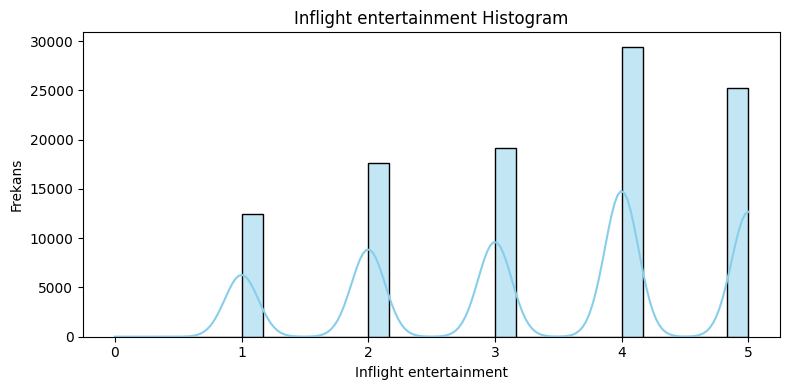

On-board service Column unique value counts:
On-board service
0        3
1    11872
2    14681
3    22833
4    30867
5    23648
Name: count, dtype: int64
__________________________________________________


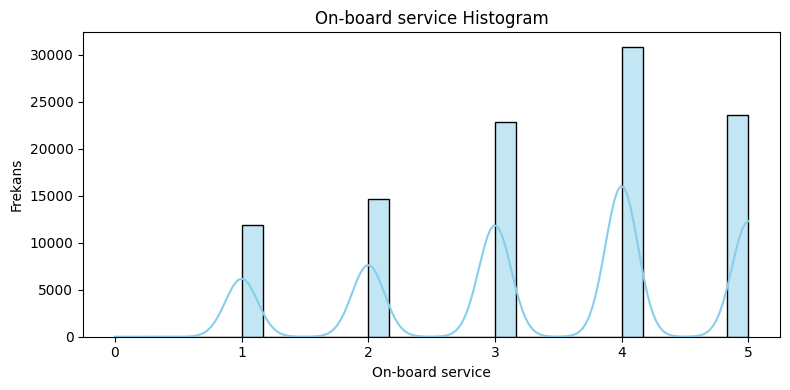

Leg room service Column unique value counts:
Leg room service
0      472
1    10353
2    19525
3    20098
4    28789
5    24667
Name: count, dtype: int64
__________________________________________________


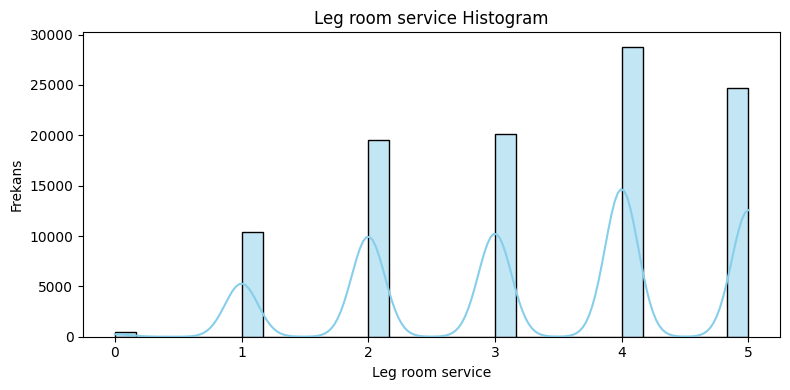

Baggage handling Column unique value counts:
Baggage handling
1     7237
2    11521
3    20632
4    37383
5    27131
Name: count, dtype: int64
__________________________________________________


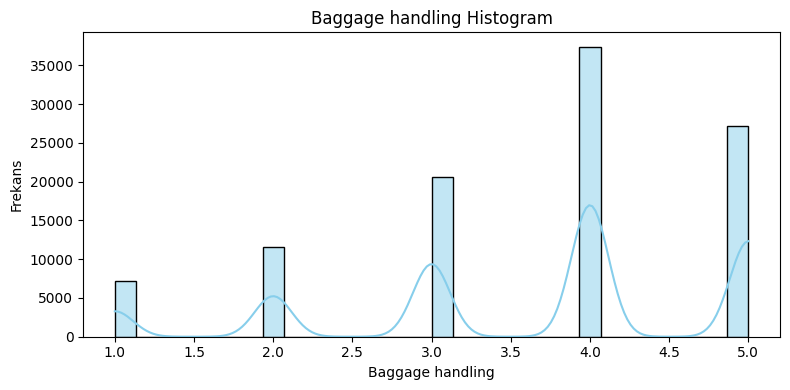

Checkin service Column unique value counts:
Checkin service
0        1
1    12890
2    12893
3    28446
4    29055
5    20619
Name: count, dtype: int64
__________________________________________________


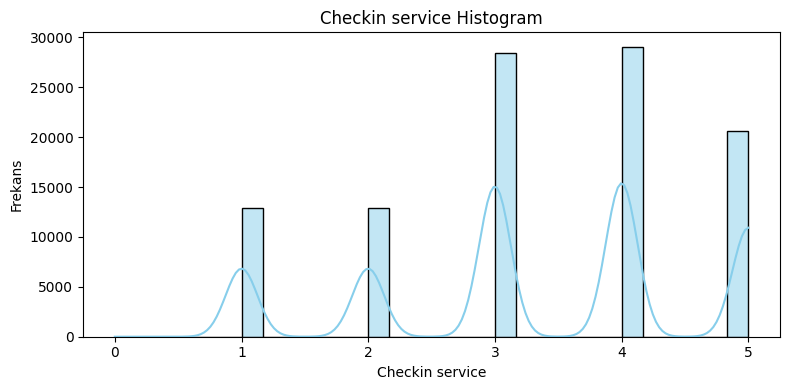

Inflight service Column unique value counts:
Inflight service
0        3
1     7084
2    11457
3    20299
4    37945
5    27116
Name: count, dtype: int64
__________________________________________________


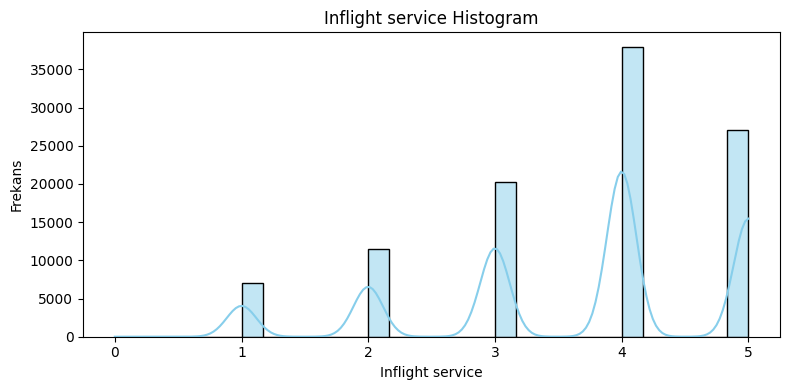

Cleanliness Column unique value counts:
Cleanliness
0       12
1    13318
2    16132
3    24574
4    27179
5    22689
Name: count, dtype: int64
__________________________________________________


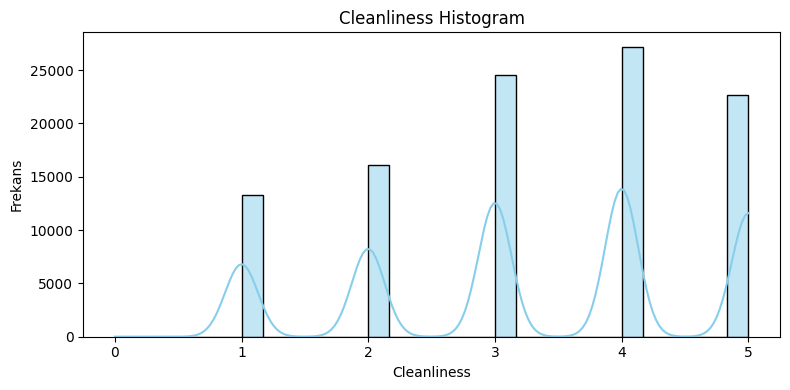

Departure Delay in Minutes Column unique value counts:
Departure Delay in Minutes
0       58668
1        2948
2        2274
3        2009
4        1854
        ...  
933         1
978         1
1017        1
1305        1
1592        1
Name: count, Length: 446, dtype: int64
__________________________________________________


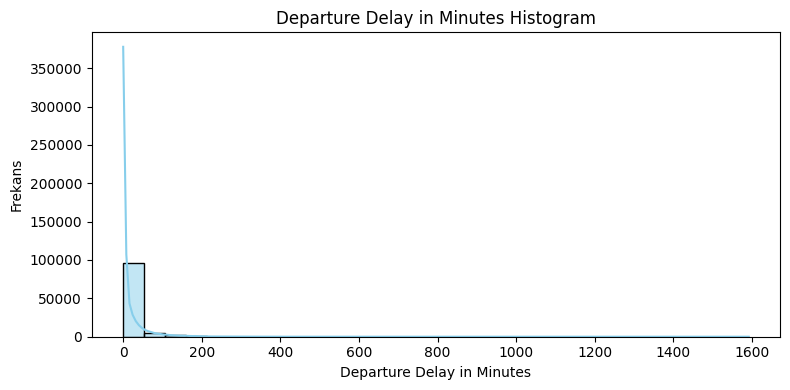

Arrival Delay in Minutes Column unique value counts:
Arrival Delay in Minutes
0.0       58159
1.0        2211
2.0        2064
3.0        1952
4.0        1907
          ...  
952.0         1
970.0         1
1011.0        1
1280.0        1
1584.0        1
Name: count, Length: 455, dtype: int64
__________________________________________________


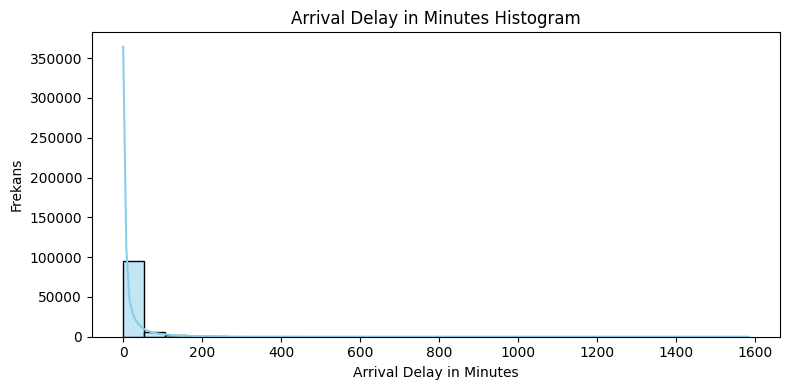

In [181]:
# Her kolon için değer sayısını ve histogram grafiğini yazdır
for col in numerical_cols:
    print(f'{col} Column unique value counts:')
    print(passenger_satisfaction[col].value_counts().sort_index())  # Daha okunaklı sıralama
    print('_' * 50)

    plt.figure(figsize=(8,4))
    sns.histplot(passenger_satisfaction[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frekans')
    plt.tight_layout()
    plt.show()

# Memnuniyet İlişkilerinin İncelenmesi

### Sayısal Değerler ile Memnuniyet Değerlendirmesi

**Sayısal değer karşılaştırması için 'satisfaction' verisini sayısal değere çevirelim**

>normal ya da memnuniyetsiz: 0
>memnun : 1

In [228]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [325]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


#### Level Puanlamasına sahip olanların İlişkileri

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


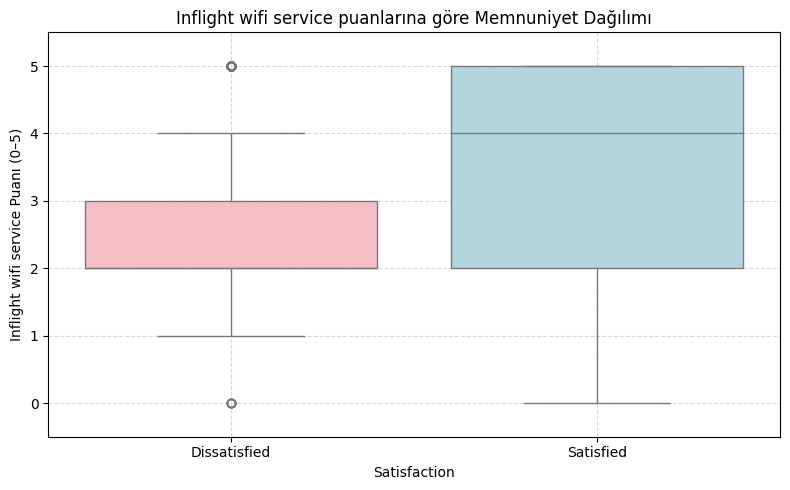

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


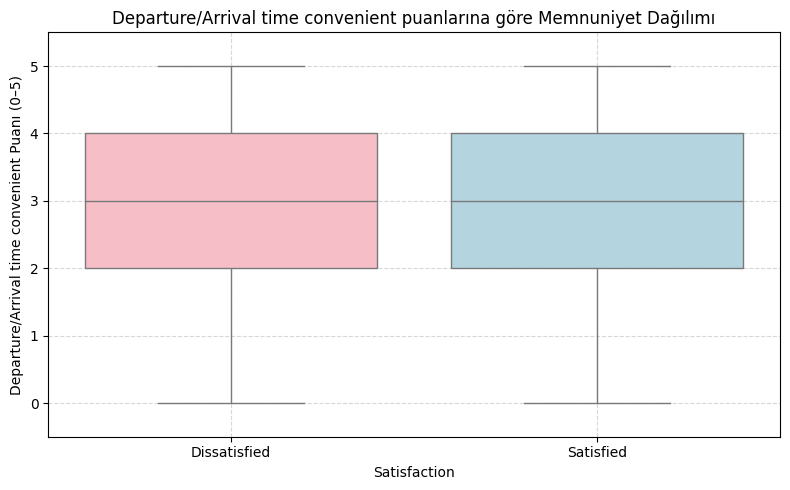

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


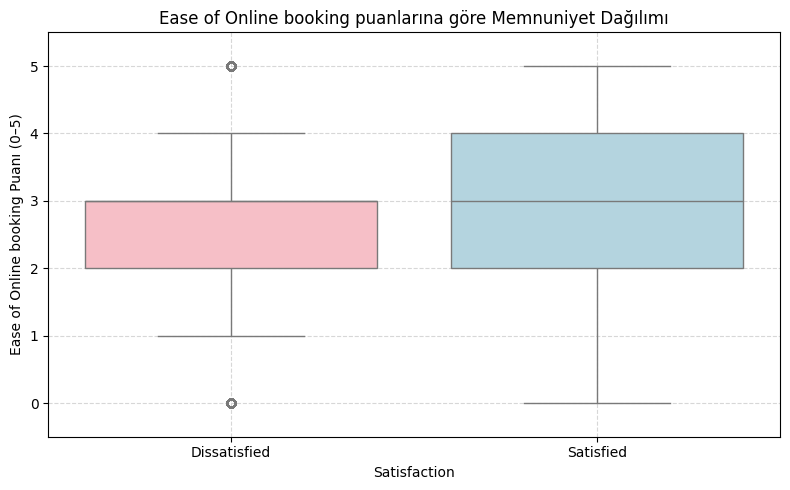

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


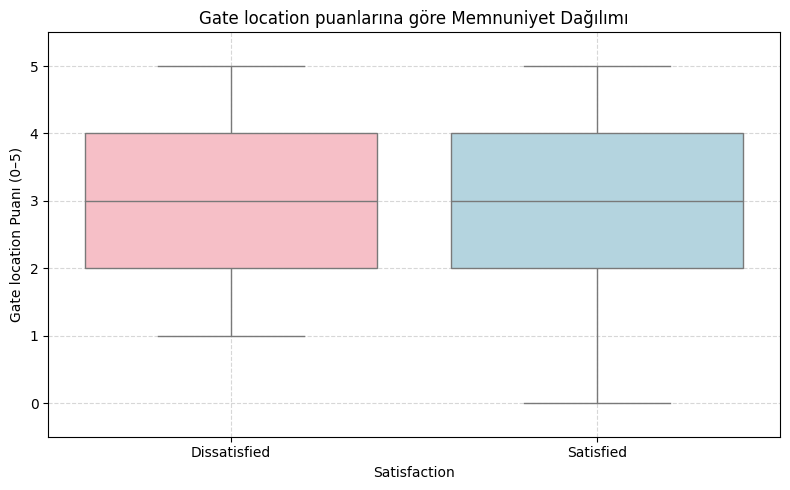

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


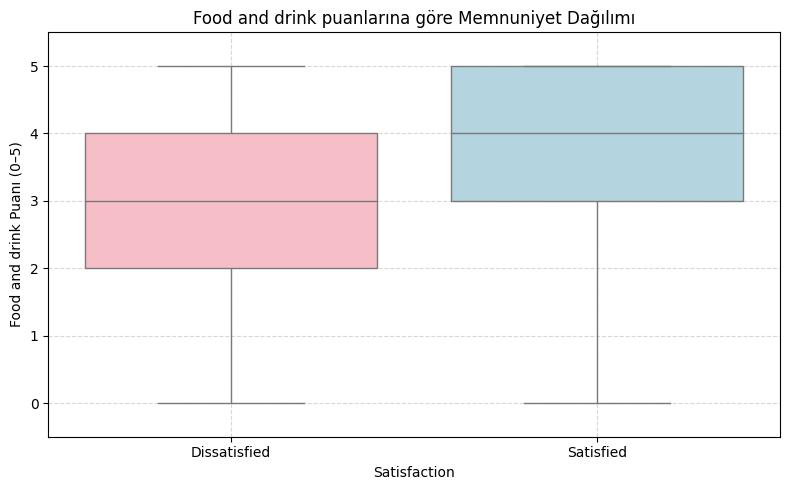

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


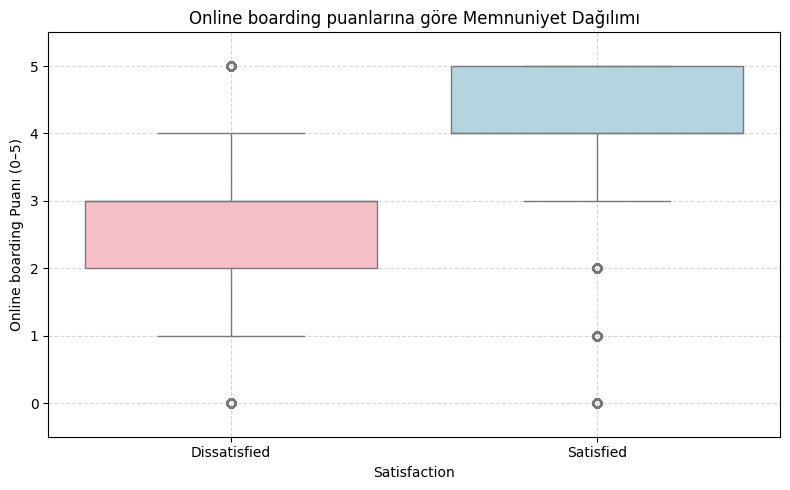

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


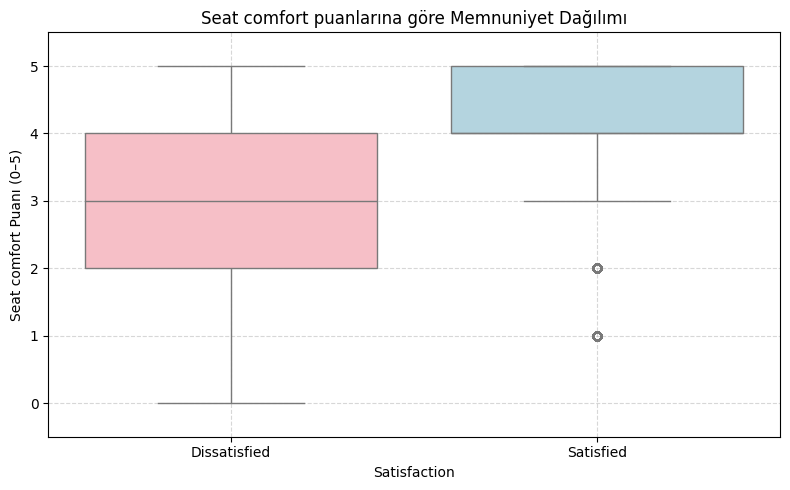

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


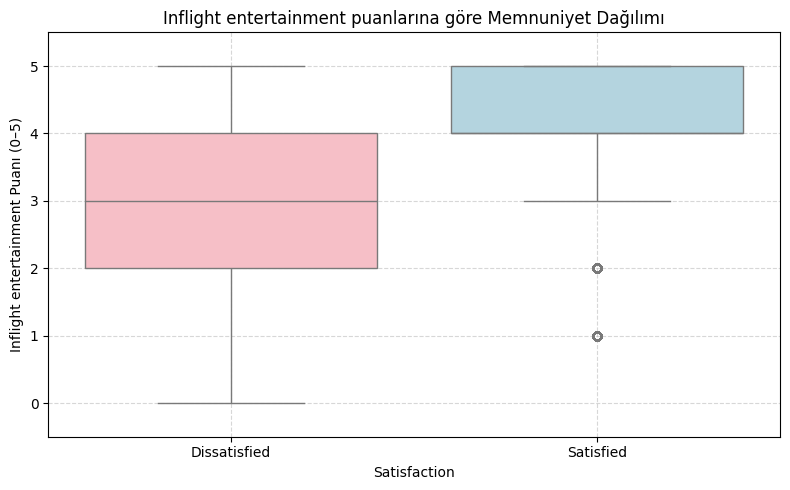

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


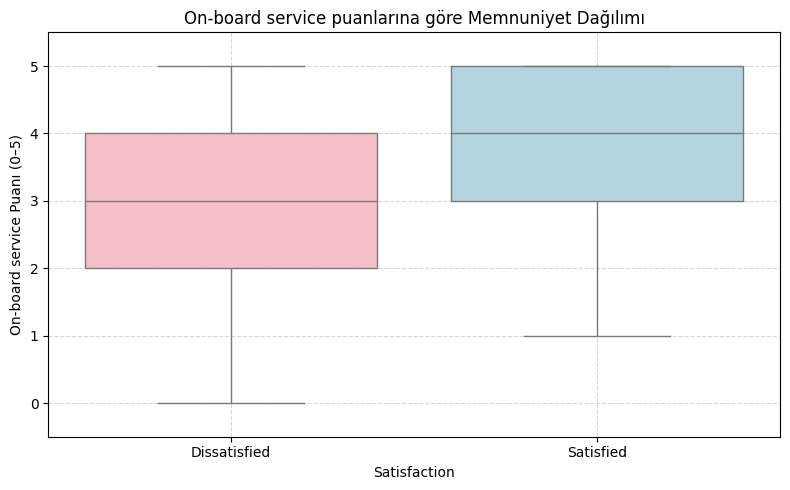

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


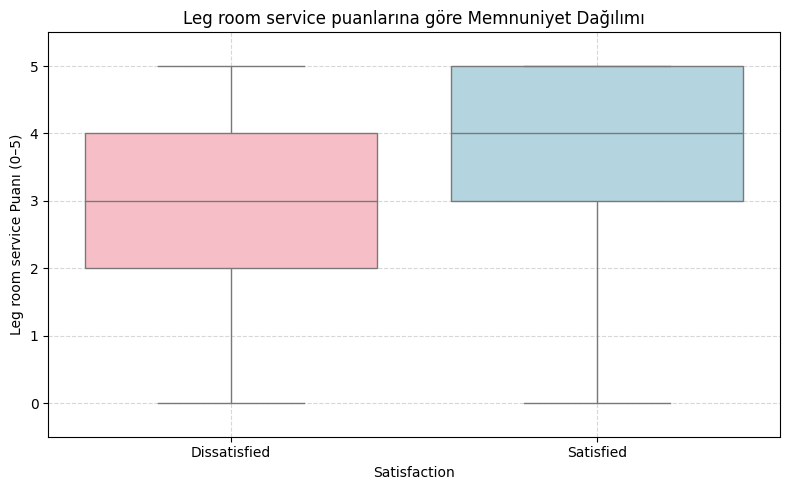

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


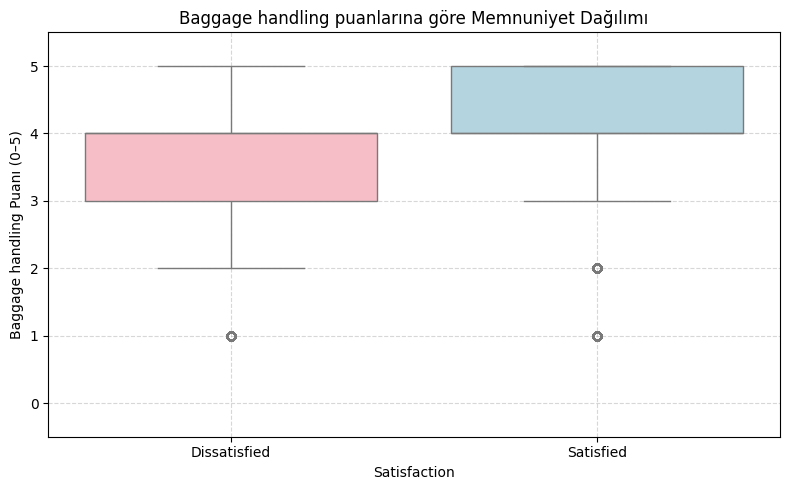

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


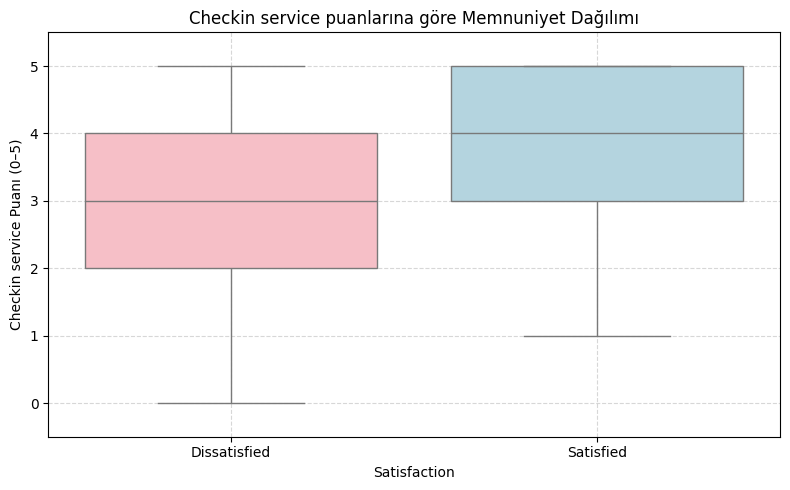

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


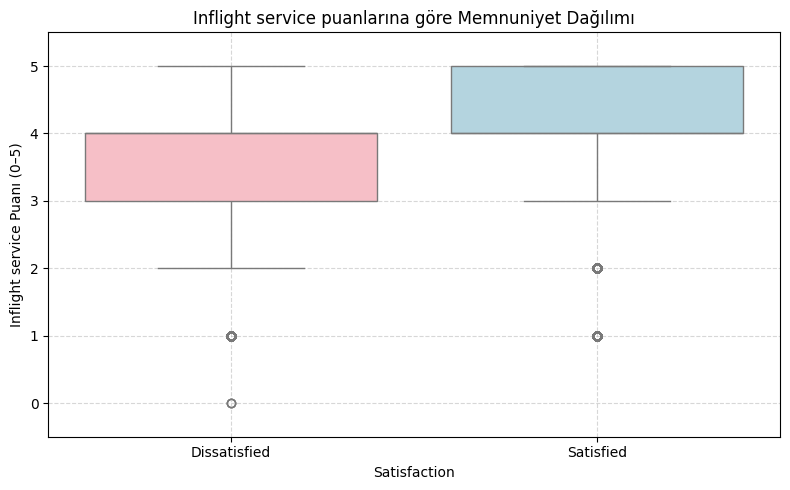

/tmp/ipython-input-184-3371990804.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])


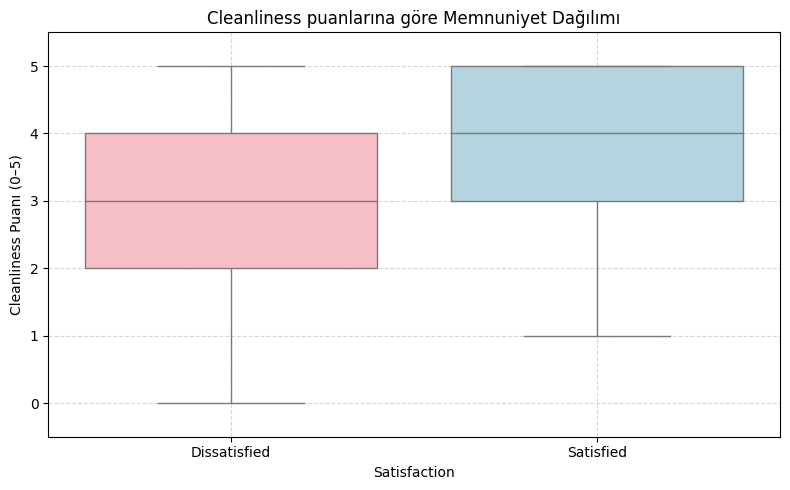

In [184]:
# Memnuniyet skorunu kategorik yap (görsel için daha açıklayıcı olur)
df['satisfaction'] = df['satisfaction'].map({0: 'Dissatisfied', 1: 'Satisfied'})

# Puanlanan sütunlar
rating_columns = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

# Her bir sütun için boxplot çizimi
for col in rating_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='satisfaction', y=col, data=df, palette=["#ffb6c1", "#add8e6"])
    plt.title(f'{col} puanlarına göre Memnuniyet Dağılımı')
    plt.xlabel('Satisfaction')
    plt.ylabel(f'{col} Puanı (0–5)')
    plt.ylim(-0.5, 5.5)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


#### Age, Departure Delay, Arrival Delay ve Flight Distance ile ilişkisi

##### Age

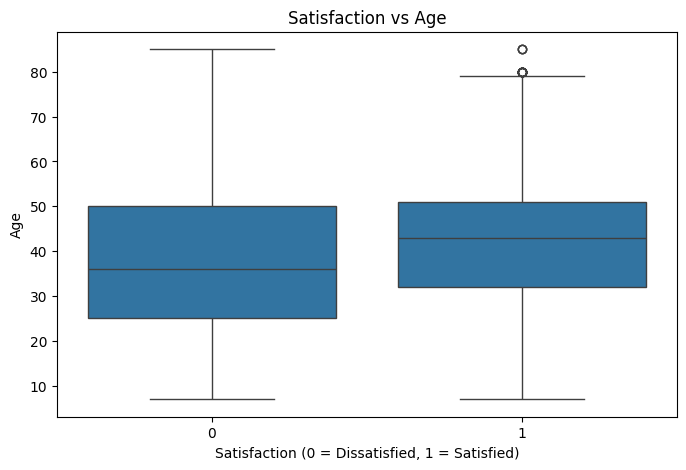

In [207]:
#Age vs Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Age', data=df)
plt.title('Satisfaction vs Age')
plt.xlabel('Satisfaction (0 = Dissatisfied, 1 = Satisfied)')
plt.ylabel('Age')
plt.show()


##### Departure Delay

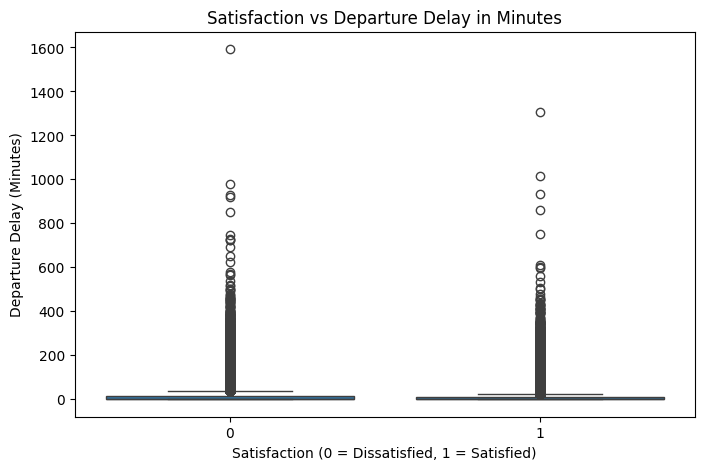

In [219]:
# Departure Delay vs Satisfaction with boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=df)
plt.title('Satisfaction vs Departure Delay in Minutes')
plt.xlabel('Satisfaction (0 = Dissatisfied, 1 = Satisfied)')
plt.ylabel('Departure Delay (Minutes)')
plt.show()

/tmp/ipython-input-221-1159585667.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['satisfaction'] == 0, 'Departure Delay in Minutes'], shade=True, label='Dissatisfied')
/tmp/ipython-input-221-1159585667.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['satisfaction'] == 1, 'Departure Delay in Minutes'], shade=True, label='Satisfied')


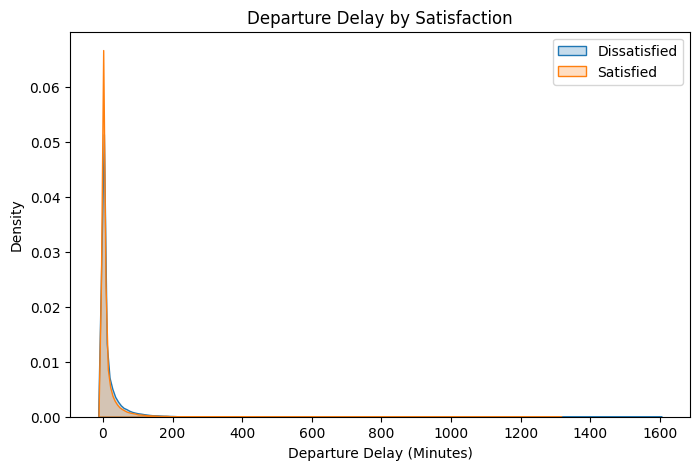

In [221]:
# Departure Delay vs Satisfaction woth kde (kernel density estimate)
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df['satisfaction'] == 0, 'Departure Delay in Minutes'], shade=True, label='Dissatisfied')
sns.kdeplot(df.loc[df['satisfaction'] == 1, 'Departure Delay in Minutes'], shade=True, label='Satisfied')
plt.title('Departure Delay by Satisfaction')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()


##### Arrival Delay

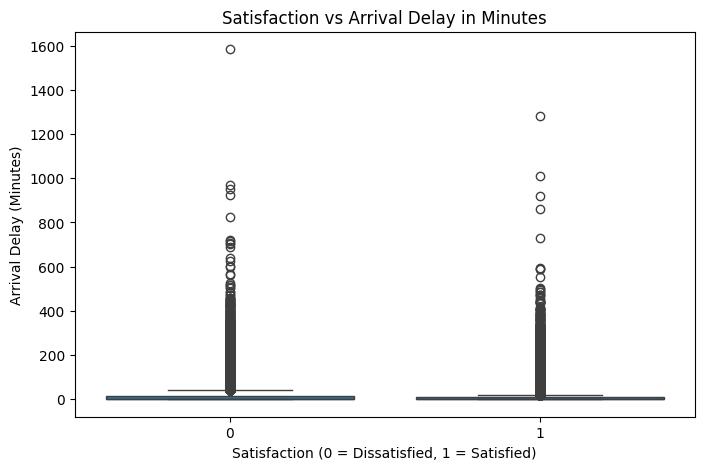

In [222]:
#Arrival Delay vs Satisfaction with boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=df)
plt.title('Satisfaction vs Arrival Delay in Minutes')
plt.xlabel('Satisfaction (0 = Dissatisfied, 1 = Satisfied)')
plt.ylabel('Arrival Delay (Minutes)')
plt.show()

/tmp/ipython-input-223-3255506091.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['satisfaction'] == 0, 'Arrival Delay in Minutes'], shade=True, label='Dissatisfied')
/tmp/ipython-input-223-3255506091.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['satisfaction'] == 1, 'Arrival Delay in Minutes'], shade=True, label='Satisfied')


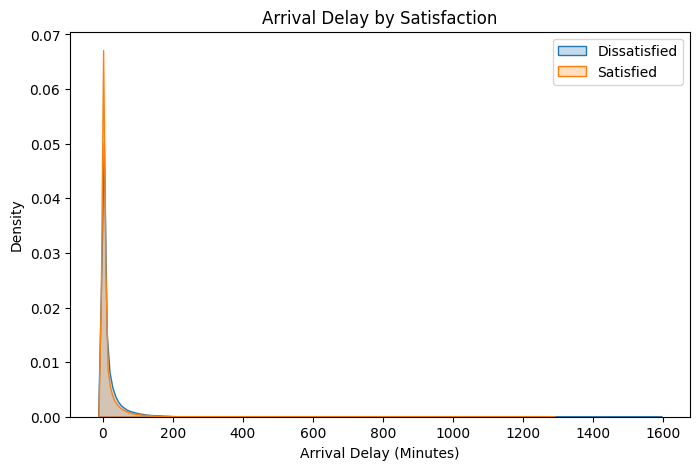

In [223]:
#Arrival Delay vs Satisfaction with kde
plt.figure(figsize=(8, 5))
sns.kdeplot(df.loc[df['satisfaction'] == 0, 'Arrival Delay in Minutes'], shade=True, label='Dissatisfied')
sns.kdeplot(df.loc[df['satisfaction'] == 1, 'Arrival Delay in Minutes'], shade=True, label='Satisfied')
plt.title('Arrival Delay by Satisfaction')
plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()


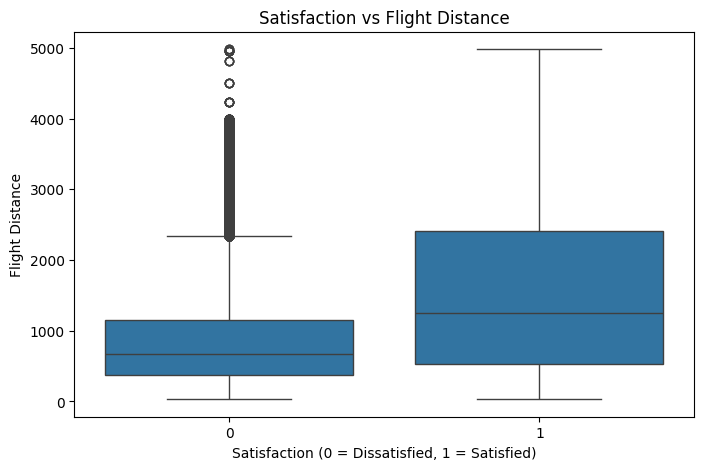

In [210]:
#Flight Distance vs Satisfaction with boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Flight Distance', data=df)
plt.title('Satisfaction vs Flight Distance')
plt.xlabel('Satisfaction (0 = Dissatisfied, 1 = Satisfied)')
plt.ylabel('Flight Distance')
plt.show()

/tmp/ipython-input-225-2275481132.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['satisfaction'] == 0, 'Flight Distance'], shade=True, label='Dissatisfied')
/tmp/ipython-input-225-2275481132.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['satisfaction'] == 1, 'Flight Distance'], shade=True, label='Satisfied')


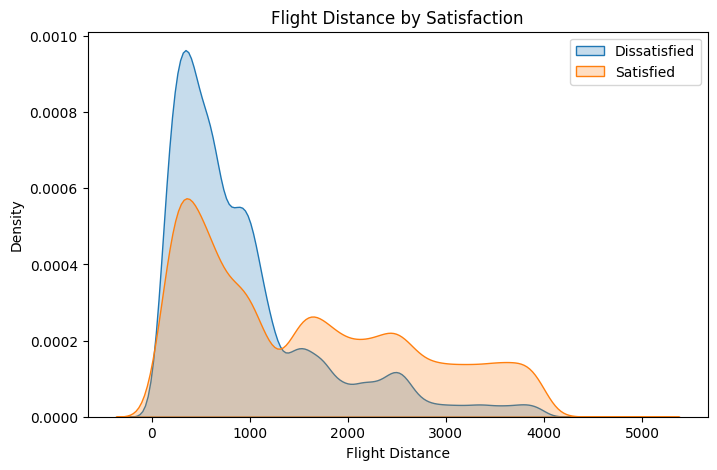

In [225]:
#Flight Distance vs Satisfaction with kde
plt.figure(figsize=(8, 5))
sns.kdeplot(df.loc[df['satisfaction'] == 0, 'Flight Distance'], shade=True, label='Dissatisfied')
sns.kdeplot(df.loc[df['satisfaction'] == 1, 'Flight Distance'], shade=True, label='Satisfied')
plt.title('Flight Distance by Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Density')
plt.legend()
plt.show()

### Kategorik Verilerin Memnuniyet Değerlendirmesi

**Bu alanda 'satisfaction' verisini kategorik şekilde alacağız**

#### Gender

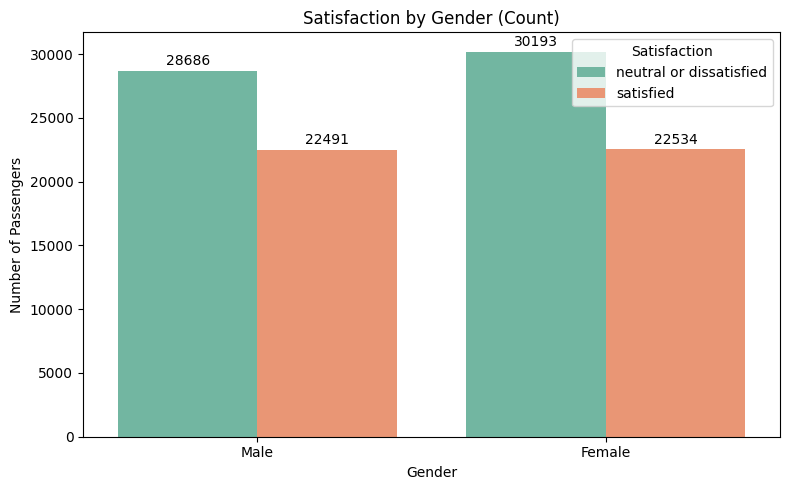

In [301]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Gender', hue='satisfaction', palette='Set2')

# Sayısal etiketleri çubukların üzerine ekleyelim
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title('Satisfaction by Gender (Count)')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()


In [302]:
gender_satisfaction = df.groupby(['Gender', 'satisfaction']).size().reset_index(name='count')
gender_total = gender_satisfaction.groupby('Gender')['count'].transform('sum')
gender_satisfaction['percent'] = round(100 * gender_satisfaction['count'] / gender_total, 1)

gender_satisfaction.head()


,Gender,satisfaction,count,percent
0,Female,neutral or dissatisfied,30193,57.3
1,Female,satisfied,22534,42.7
2,Male,neutral or dissatisfied,28686,56.1
3,Male,satisfied,22491,43.9


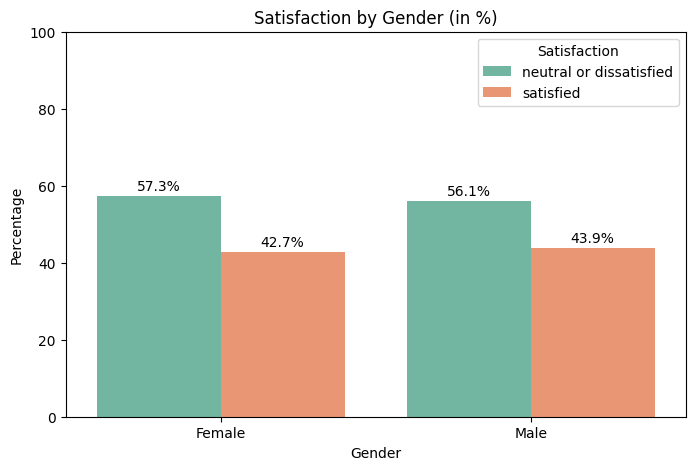

In [303]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=gender_satisfaction,
    x='Gender',
    y='percent',
    hue='satisfaction',
    palette='Set2'
)

# Yüzdelik etiketleri yaz
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

plt.title('Satisfaction by Gender (in %)')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Satisfaction')
plt.ylim(0, 100)
plt.show()


#### Customer Type

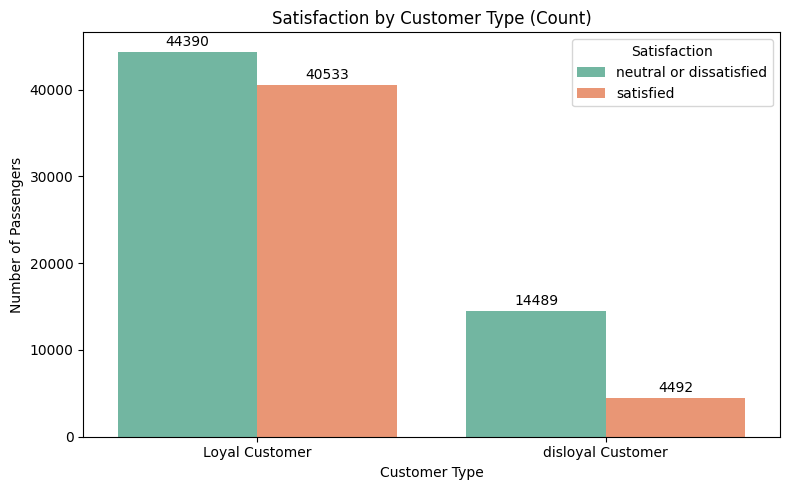

In [304]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Customer Type', hue='satisfaction', palette='Set2')

# Sayısal etiketleri çubukların üzerine ekleyelim
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title('Satisfaction by Customer Type (Count)')
plt.xlabel('Customer Type')
plt.ylabel('Number of Passengers')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()


In [306]:
customer_satisfaction = df.groupby(['Customer Type', 'satisfaction']).size().reset_index(name='count')
customer_total = customer_satisfaction.groupby('Customer Type')['count'].transform('sum')
customer_satisfaction['percent'] = round(100 * customer_satisfaction['count'] / customer_total, 1)

print(customer_satisfaction)


       Customer Type             satisfaction  count  percent
0     Loyal Customer  neutral or dissatisfied  44390     52.3
1     Loyal Customer                satisfied  40533     47.7
2  disloyal Customer  neutral or dissatisfied  14489     76.3
3  disloyal Customer                satisfied   4492     23.7


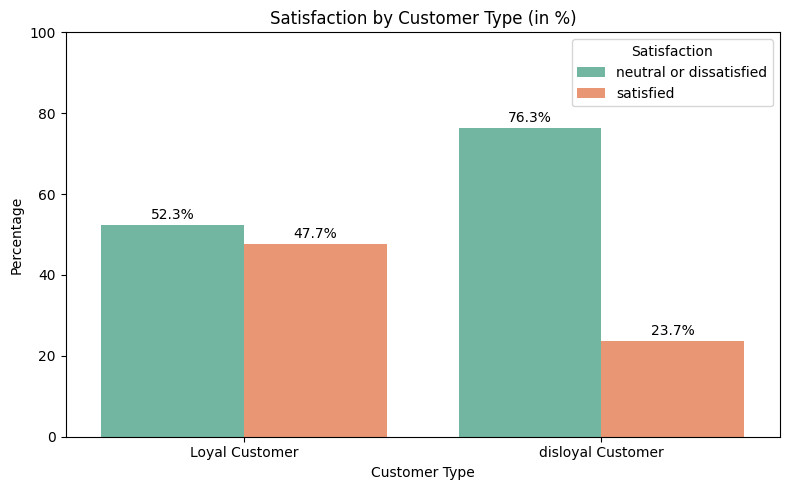

In [307]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=customer_satisfaction,
    x='Customer Type',
    y='percent',
    hue='satisfaction',
    palette='Set2'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

plt.title('Satisfaction by Customer Type (in %)')
plt.ylabel('Percentage')
plt.xlabel('Customer Type')
plt.legend(title='Satisfaction')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


#### Type of Travel

In [308]:
# Grupla ve say
travel_satisfaction = df.groupby(['Type of Travel', 'satisfaction']).size().reset_index(name='count')

# Yüzdeyi hesapla
travel_total = travel_satisfaction.groupby('Type of Travel')['count'].transform('sum')
travel_satisfaction['percent'] = round(100 * travel_satisfaction['count'] / travel_total, 1)

print(travel_satisfaction)


    Type of Travel             satisfaction  count  percent
0  Business travel  neutral or dissatisfied  29909     41.7
1  Business travel                satisfied  41746     58.3
2  Personal Travel  neutral or dissatisfied  28970     89.8
3  Personal Travel                satisfied   3279     10.2


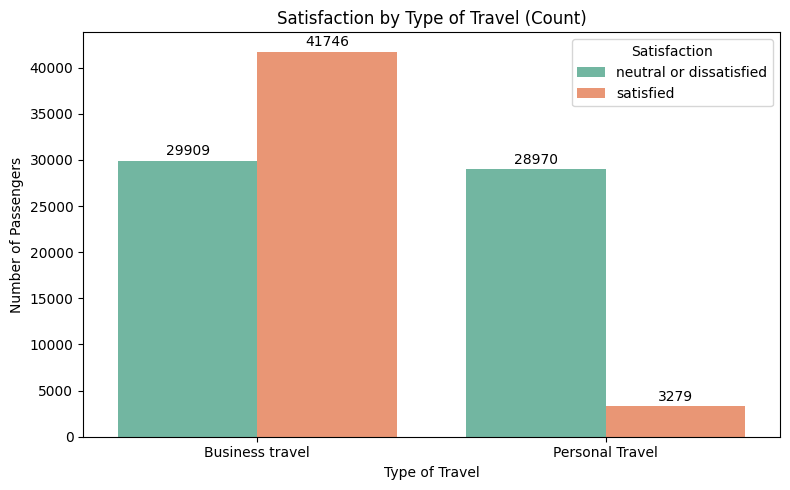

In [309]:
plt.figure(figsize=(8, 5))
ax1 = sns.barplot(
    data=travel_satisfaction,
    x='Type of Travel',
    y='count',
    hue='satisfaction',
    palette='Set2'
)

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title('Satisfaction by Type of Travel (Count)')
plt.ylabel('Number of Passengers')
plt.xlabel('Type of Travel')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()


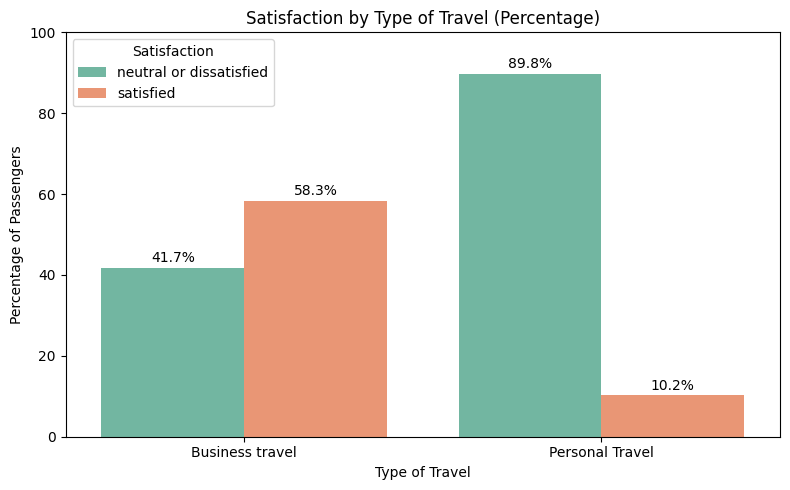

In [310]:
plt.figure(figsize=(8, 5))
ax2 = sns.barplot(
    data=travel_satisfaction,
    x='Type of Travel',
    y='percent',
    hue='satisfaction',
    palette='Set2'
)

for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

plt.title('Satisfaction by Type of Travel (Percentage)')
plt.ylabel('Percentage of Passengers')
plt.xlabel('Type of Travel')
plt.ylim(0, 100)
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()


#### Class

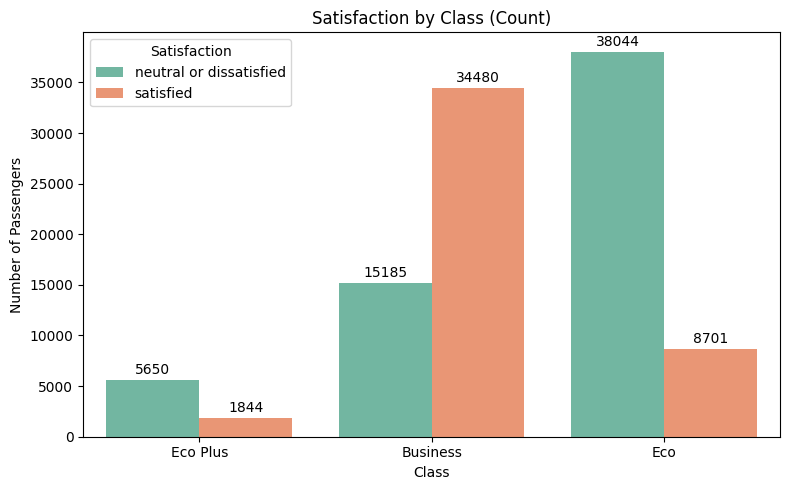

In [311]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Class', hue='satisfaction', palette='Set2')

# Bar üzerine sayısal etiket ekleme
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title('Satisfaction by Class (Count)')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()


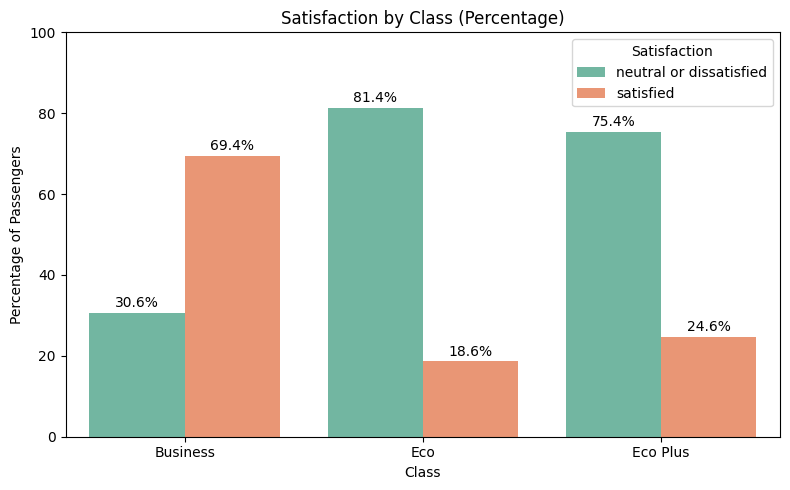

In [312]:
# Oranları hesaplamak için dataframe hazırlığı
class_satisfaction = df.groupby(['Class', 'satisfaction']).size().reset_index(name='count')
total_by_class = df.groupby('Class').size().reset_index(name='total')
class_satisfaction = class_satisfaction.merge(total_by_class, on='Class')
class_satisfaction['percent'] = 100 * class_satisfaction['count'] / class_satisfaction['total']

# Grafik çizimi
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=class_satisfaction, x='Class', y='percent', hue='satisfaction', palette='Set2')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

plt.title('Satisfaction by Class (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage of Passengers')
plt.legend(title='Satisfaction')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


### Özel İlişki İncelemeleri

#### Business travel yapanların büyük kısmı Business Class’ta mı?

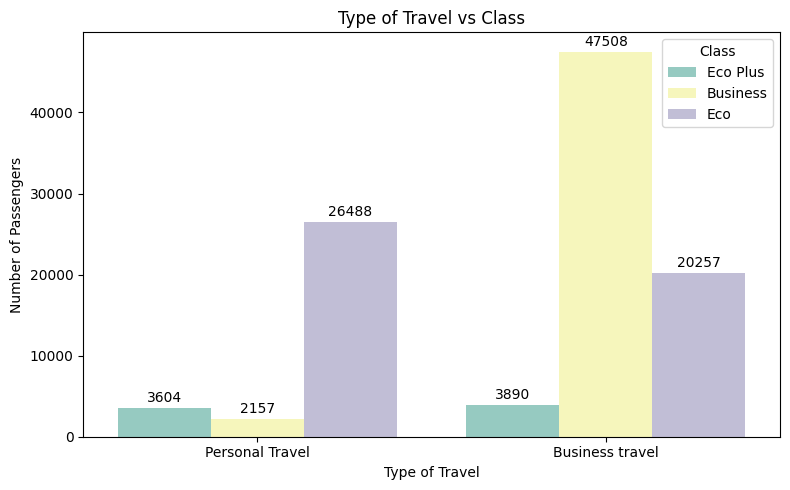

In [323]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Type of Travel', hue='Class', palette='Set3')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title('Type of Travel vs Class')
plt.xlabel('Type of Travel')
plt.ylabel('Number of Passengers')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


#### Business Travel yapanların çoğu erkek mi?

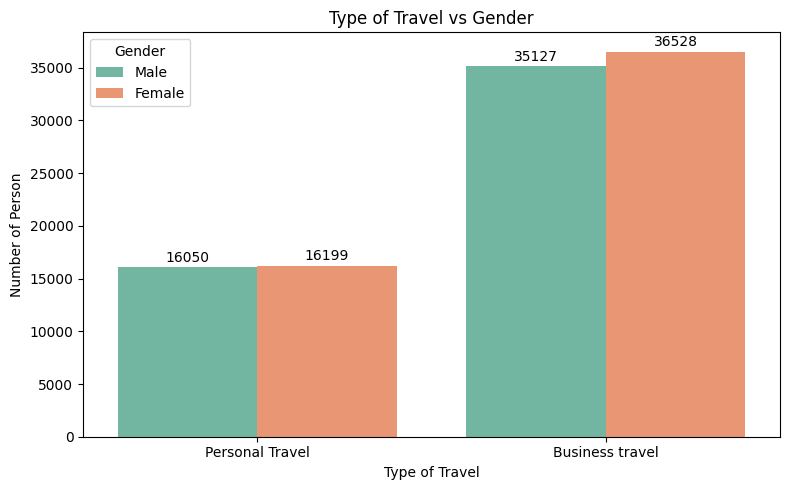

In [328]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Type of Travel', hue='Gender', palette='Set2')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title('Type of Travel vs Gender')
plt.xlabel('Type of Travel')
plt.ylabel('Number of Person')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
